# Kodluyoruz & Carbon Consulting Data Science Bootcamp

## Week04 Task2

### By : Berk Pişkin

In this project, I will apply K-means clustering algorithm on a preprocessed dataset,whose raw version is collected from the 1990 Carlifornia Census. Feautures of interest are the following:

* **MedInc** : Median income for households within a block of houses. Measured in tens of thousands of US Dollars.

* **Latitude** : A measure of how far north a house is; a higher value is farther north.

* **Longitude** : A measure of how far west a house is; a higher value is farther west.

First aim of the project is to divide the dataset into viable economic segmentations. Second is to compare assessment metrics of different clusterings and compare their effects on segmentation.

## Preprocessing :

In [192]:
from sklearn.datasets import fetch_california_housing
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set()
matplotlib.rcParams['figure.dpi'] = 144
%matplotlib inline

dataset  = fetch_california_housing(as_frame = True)

In [259]:
X = dataset.data
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [260]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [263]:
# Take features of interest
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [264]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


## EDA :

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


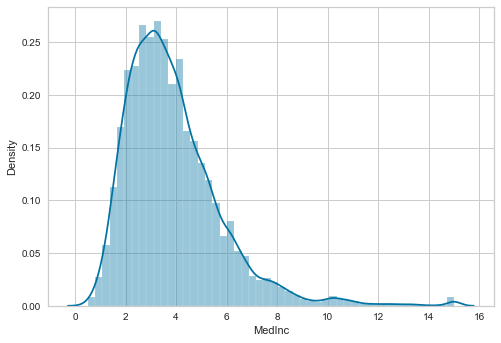

In [265]:
# Distribution of median income
sns.distplot(X["MedInc"]);

In [266]:
X_g_2 = X[X["MedInc"]>=2]
X_bw_2_4 = X_g_2[X_g_2["MedInc"]<=5]
len(X_bw_2_4) /len(X) * 100

66.43410852713178

Roughly 66% of median income values  is cumulated in 20-50 thousand dollars range.

Let's visualize latitude and longitude.

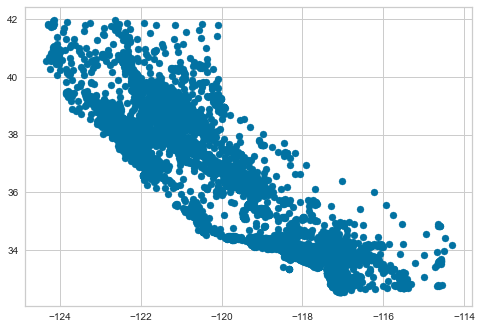

In [267]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

Seems familiar, isn't it? Well yes, this plot resembles California. But as data scientists, we can do better.

C:\Users\BROTIA~1\AppData\Local\Temp/ipykernel_8924/337786366.py:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  cali_img = plt.imread(cali_url)
C:\Users\BROTIA~1\AppData\Local\Temp/ipykernel_8924/337786366.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


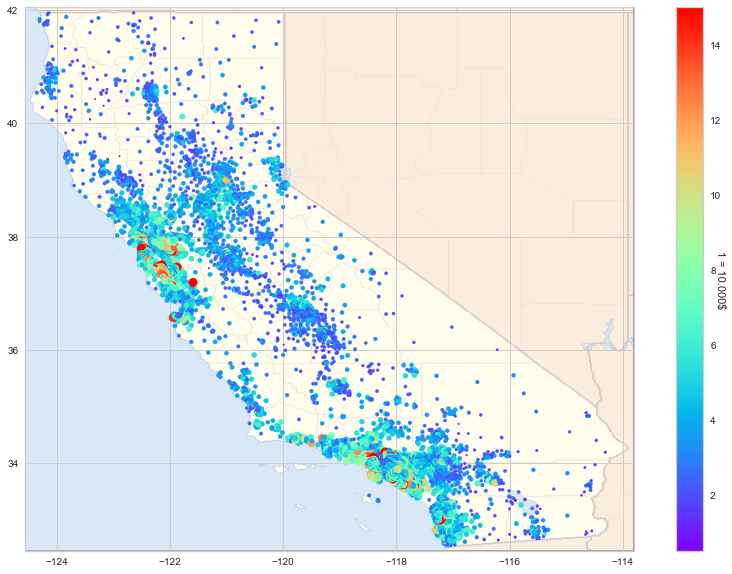

In [269]:

cali_url = 'https://upload.wikimedia.org/wikipedia/commons/1/1b/California_Locator_Map.PNG'
cali_img = plt.imread(cali_url)


plt.figure(figsize=(15,10))
img = plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.4)
plt.scatter(X["Longitude"],X["Latitude"],c=X["MedInc"],s=X["MedInc"]*5,cmap="rainbow")
cbar = plt.colorbar()
cbar.set_label('1 = 10.000$', rotation=270)
plt.show()

First key observation is the cumulatilon of households having higher income is at coasts. The two most dense regions are very close to San Francisco and Los Angeles, so there is a high chance that these cities plays a big role in this cluster formation. But regarding the cities, the further we move away from the shores, median house income has a tendency to descent. Let's employ KMeans clustering to verify our claims.

## KMeans Clustering Step :

In [250]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Number of clusters = 2

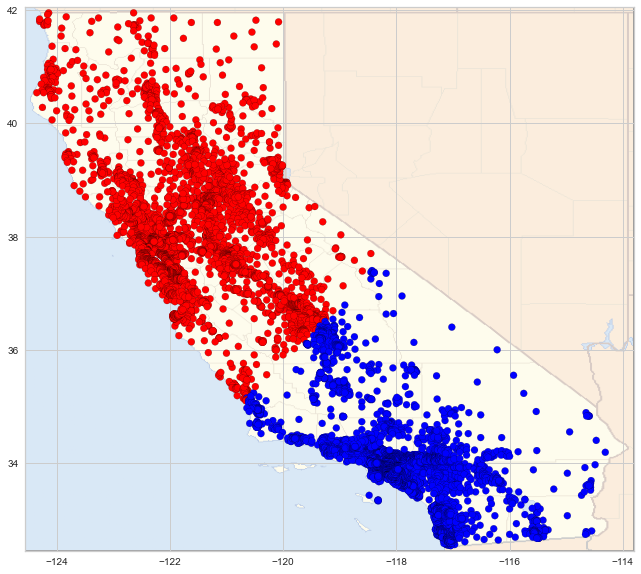

In [253]:
kmeans = KMeans(n_clusters = 2)
kpred = kmeans.fit_predict(X_scaled)
X2 = X.copy()
X2["cluster_no"] = kpred
X2["cluster_no"] = X2["cluster_no"].astype("category")
plt.figure(figsize=(15,10))
img = plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.4)
colors = {0 :"blue",1:"red"}
plt.scatter(X2["Longitude"],X2["Latitude"],c=X2["cluster_no"].map(colors),linewidths=0.15,edgecolors="black")

#### Silhouette Score : 

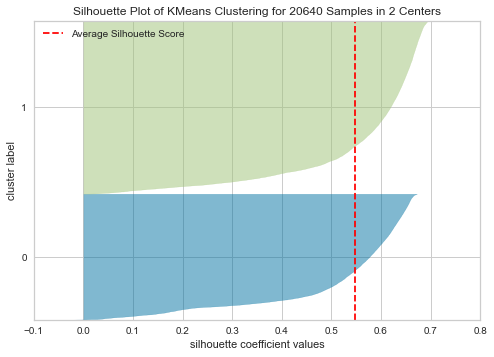

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20640 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [215]:
visualizer = SilhouetteVisualizer(kmeans,colors="yellowbrick")
visualizer.fit(X_scaled)
visualizer.show()

#### Number of clusters = 3

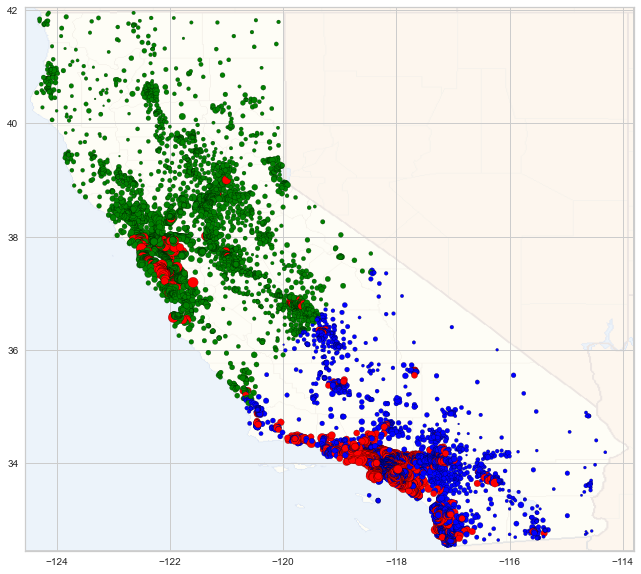

In [254]:
kmeans = KMeans(n_clusters = 3,random_state=39)
kpred = kmeans.fit_predict(X_scaled)
X3 = X.copy()
X3["cluster_no"] = kpred
X3["cluster_no"] = X3["cluster_no"].astype("category")
plt.figure(figsize=(15,10))
img = plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.2)
colors = {0 :"blue",1:"red",2:"green"}
plt.scatter(X3["Longitude"],X3["Latitude"],s=X["MedInc"]*7,c=X3["cluster_no"].map(colors),linewidths=0.2,edgecolors="black")

#### Silhouette Score : 

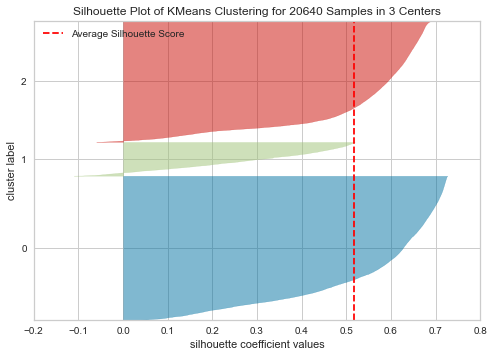

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20640 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [217]:
visualizer = SilhouetteVisualizer(kmeans,colors="yellowbrick")
visualizer.fit(X_scaled)
visualizer.show()

#### Number of clusters = 4

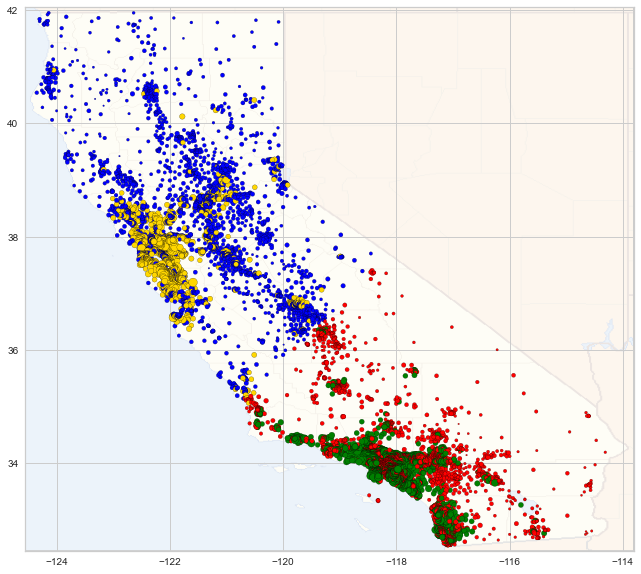

In [255]:
kmeans = KMeans(n_clusters = 4,random_state=41)
kpred = kmeans.fit_predict(X_scaled)
X4 = X.copy()
X4["cluster_no"] = kpred
X4["cluster_no"] = X4["cluster_no"].astype("category")
plt.figure(figsize=(15,10))
img = plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.2)
colors = {0 :"blue",1:"red",2:"green",3:"gold"}
plt.scatter(X4["Longitude"],X4["Latitude"],s=X["MedInc"]*5,c=X4["cluster_no"].map(colors),linewidths=0.2,edgecolors="black")

#### Silhouette Score : 

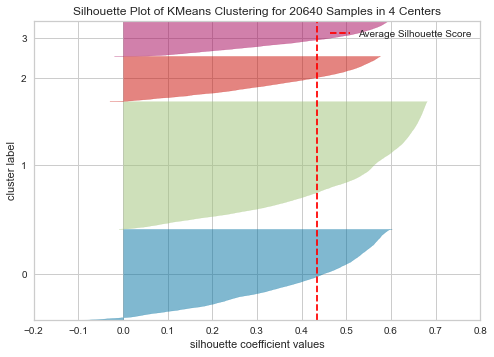

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20640 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [221]:
visualizer = SilhouetteVisualizer(kmeans,colors="yellowbrick")
visualizer.fit(X_scaled)
visualizer.show()

#### Number of clusters = 5

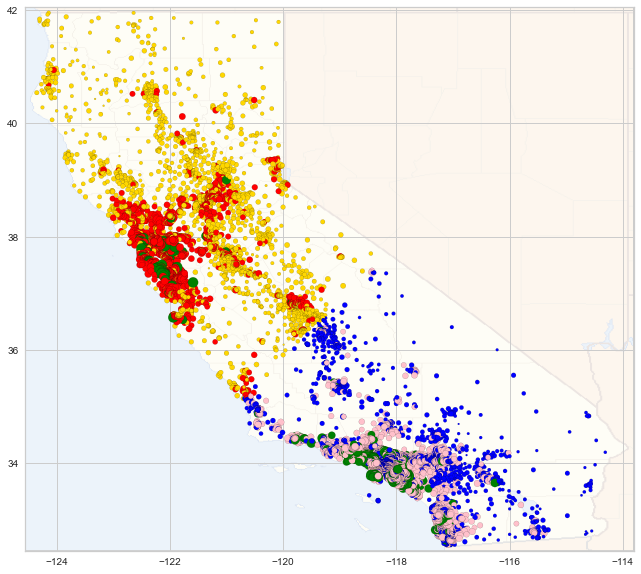

In [256]:
kmeans = KMeans(n_clusters = 5,random_state=39)
kpred = kmeans.fit_predict(X_scaled)
X5 = X.copy()
X5["cluster_no"] = kpred
X5["cluster_no"] = X5["cluster_no"].astype("category")
plt.figure(figsize=(15,10))
img = plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.2)
colors = {0 :"blue",1:"red",2:"green",3:"gold",4:"pink"}
plt.scatter(X5["Longitude"],X5["Latitude"],s=X["MedInc"]*7,c=X5["cluster_no"].map(colors),linewidths=0.1,edgecolors="black")

#### Silhouette Score : 

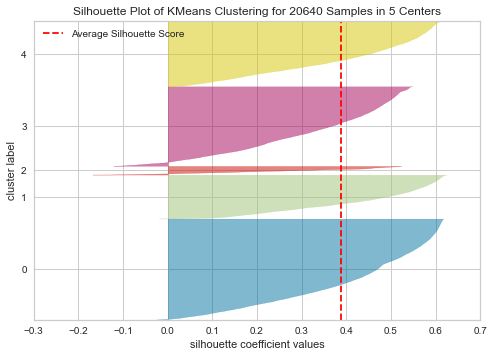

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20640 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [223]:
visualizer = SilhouetteVisualizer(kmeans,colors="yellowbrick")
visualizer.fit(X_scaled)
visualizer.show()

#### Number of clusters = 6

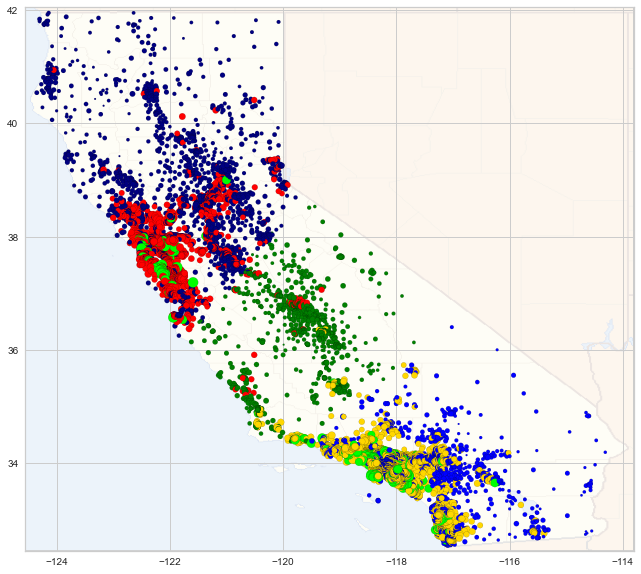

In [251]:
kmeans = KMeans(n_clusters = 6,random_state=40)
kpred = kmeans.fit_predict(X_scaled)
X6 = X.copy()
X6["cluster_no"] = kpred
X6["cluster_no"] = X6["cluster_no"].astype("category")
plt.figure(figsize=(15,10))
img = plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.2)
colors = {0 :"blue",1:"red",2:"green",3:"gold",4:"lime",5:"navy"}
plt.scatter(X6["Longitude"],X6["Latitude"],s=X["MedInc"]*7,c=X6["cluster_no"].map(colors),linewidths=0.1,edgecolors="black")

#### Silhouette Score : 

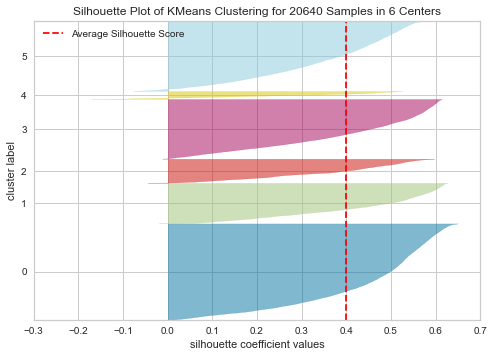

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20640 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [225]:
visualizer = SilhouetteVisualizer(kmeans,colors="yellowbrick")
visualizer.fit(X_scaled)
visualizer.show()

#### Number of clusters = 7

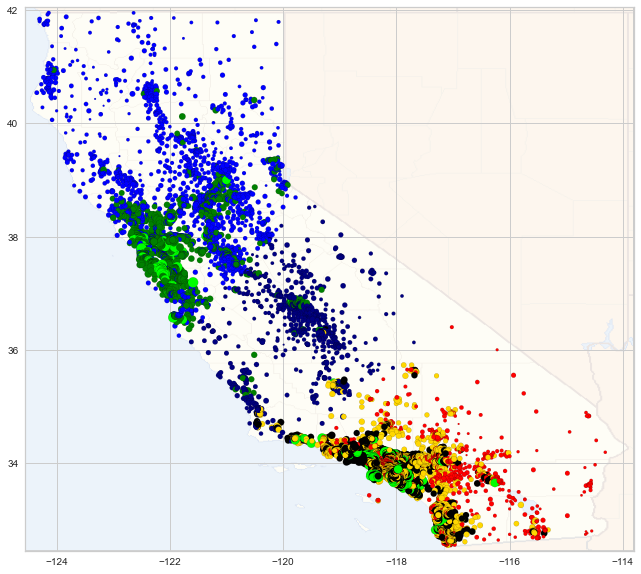

In [257]:
kmeans = KMeans(n_clusters = 7,random_state=40)
kpred = kmeans.fit_predict(X_scaled)
X7 = X.copy()
X7["cluster_no"] = kpred
X7["cluster_no"] = X7["cluster_no"].astype("category")
plt.figure(figsize=(15,10))
img = plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.2)
colors = {0 :"blue",1:"red",2:"green",3:"gold",4:"lime",5:"navy",6:"black"}
plt.scatter(X7["Longitude"],X7["Latitude"],s=X["MedInc"]*7,c=X7["cluster_no"].map(colors),linewidths=0.1,edgecolors="black")

#### Silhouette Score : 

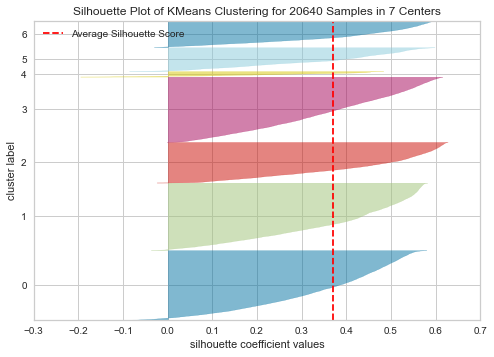

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20640 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [227]:
visualizer = SilhouetteVisualizer(kmeans,colors="yellowbrick")
visualizer.fit(X_scaled)
visualizer.show()

#### Number of clusters = 8

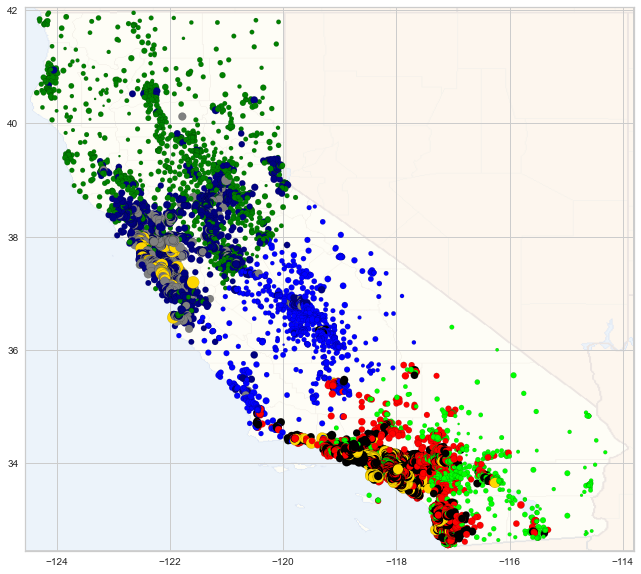

In [258]:
kmeans = KMeans(n_clusters = 8,random_state=40)
kpred = kmeans.fit_predict(X_scaled)
X8 = X.copy()
X8["cluster_no"] = kpred
X8["cluster_no"] = X8["cluster_no"].astype("category")
plt.figure(figsize=(15,10))
img = plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.2)
colors = {0 :"blue",1:"red",2:"green",3:"gold",4:"lime",5:"navy",6:"black",7:"gray"}
plt.scatter(X8["Longitude"],X8["Latitude"],s=X["MedInc"]*10,c=X8["cluster_no"].map(colors),linewidths=0.1,edgecolors="black")

#### Silhouette Score : 

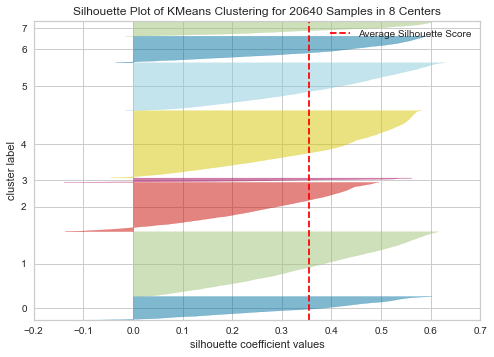

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20640 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [230]:
visualizer = SilhouetteVisualizer(kmeans,colors="yellowbrick")
visualizer.fit(X_scaled)
visualizer.show()

Result is that as I increase the number of clusters, average silhouette score decreases and cluster gets more and more unbalanced. I would say that best numbers of clustering for this dataset is 2, 3 and 4.

#### Elbow Method :

The optimal number of clusters can be also found by using the computed Inertia values and the elbow method applied on the Inertia curve.

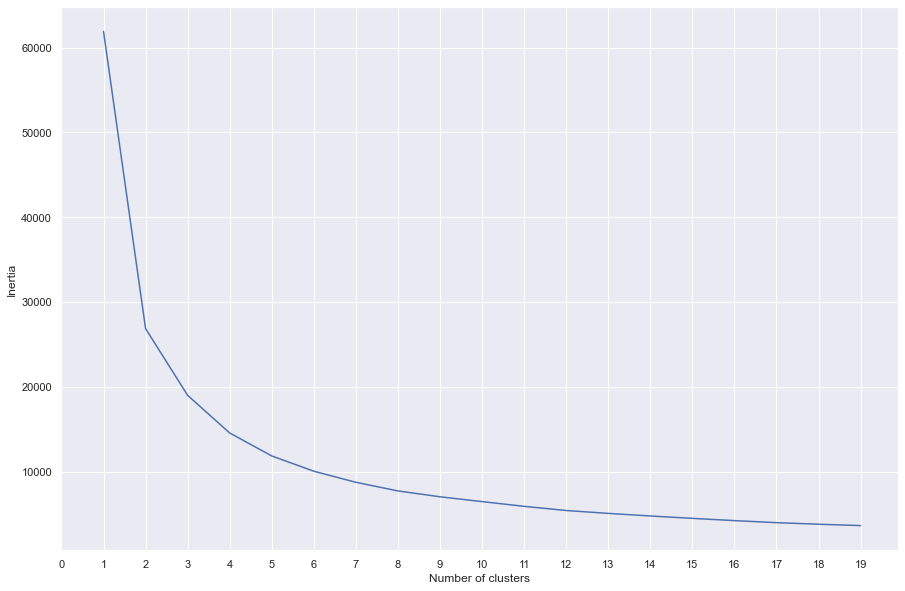

In [186]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = list()
for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster,init = "k-means++")
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,20),inertia)
plt.xticks(range(0,20))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

To select the optimal number of clusters, we look at the so-called "elbow" of this graph. Elbow is the point where graph is angled more than its other corners. We can say that after 3 or 4 clusters, algorithm start to loose it's sense.

## The End!!